# Recommendation Systems Project - Keerthana

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('ratings_Electronics.csv')
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
data.columns=['UserID','ProductID','Rating','Timestamp']
data.head()

,UserID,ProductID,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     object 
 1   ProductID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
data.describe()

,Rating,Timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
data.shape

(7824481, 4)

In [8]:
data.isnull().sum()

UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64

In [9]:
data.Rating.value_counts()

5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64

In [10]:
data.groupby('Rating')['ProductID'].nunique()

Rating
1.0    176283
2.0    123419
3.0    152827
4.0    223845
5.0    358457
Name: ProductID, dtype: int64

In [11]:
data.UserID.nunique()

4201696

In [12]:
data.ProductID.nunique()

476001

In [13]:
data.UserID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A28UXNSKTO8F19      1
A11BKSGIHL4FQU      1
A3OYHXQ7EZ1NKY      1
A1WA3BA2JOPAKM      1
AHO2D8MSGSU3K       1
Name: UserID, Length: 4201696, dtype: int64

In [14]:
noofrating=data.UserID.value_counts().rename_axis('UserID').reset_index(name='# ratings')
noofrating

,UserID,# ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
...,...,...
4201691,A28UXNSKTO8F19,1
4201692,A11BKSGIHL4FQU,1
4201693,A3OYHXQ7EZ1NKY,1
4201694,A1WA3BA2JOPAKM,1


##  Users who has given 50 or more number of ratings 

In [15]:
noofrating[noofrating['# ratings']>=50].UserID


0        A5JLAU2ARJ0BO
1         ADLVFFE4VBT8
2       A3OXHLG6DIBRW8
3         A6FIAB28IS79
4        A680RUE1FDO8B
             ...      
1535    A3JAH5WW61N2EK
1536    A11R5VW7IM6ISQ
1537    A2TVJ0YDW3QO63
1538    A1C5TCCR2IGKBU
1539    A319Y83RT0MRVR
Name: UserID, Length: 1540, dtype: object

In [16]:
topusers=noofrating.head(1540)
topusers

,UserID,# ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
...,...,...
1535,A3JAH5WW61N2EK,50
1536,A11R5VW7IM6ISQ,50
1537,A2TVJ0YDW3QO63,50
1538,A1C5TCCR2IGKBU,50


In [17]:
topusers['UserID']

0        A5JLAU2ARJ0BO
1         ADLVFFE4VBT8
2       A3OXHLG6DIBRW8
3         A6FIAB28IS79
4        A680RUE1FDO8B
             ...      
1535    A3JAH5WW61N2EK
1536    A11R5VW7IM6ISQ
1537    A2TVJ0YDW3QO63
1538    A1C5TCCR2IGKBU
1539    A319Y83RT0MRVR
Name: UserID, Length: 1540, dtype: object

In [18]:
data['UserID']=topusers['UserID']
data['UserID']

0           A5JLAU2ARJ0BO
1            ADLVFFE4VBT8
2          A3OXHLG6DIBRW8
3            A6FIAB28IS79
4           A680RUE1FDO8B
                ...      
7824476               NaN
7824477               NaN
7824478               NaN
7824479               NaN
7824480               NaN
Name: UserID, Length: 7824481, dtype: object

In [19]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit = 's')

In [20]:
data['Timestamp'].dt.year

0          2012
1          2013
2          2013
3          2012
4          2014
           ... 
7824476    2014
7824477    2011
7824478    2014
7824479    2011
7824480    2011
Name: Timestamp, Length: 7824481, dtype: int64

In [21]:
data['Timestamp']=data['Timestamp'].dt.year

In [22]:
data

,UserID,ProductID,Rating,Timestamp
0,A5JLAU2ARJ0BO,0321732944,5.0,2012
1,ADLVFFE4VBT8,0439886341,1.0,2013
2,A3OXHLG6DIBRW8,0439886341,3.0,2013
3,A6FIAB28IS79,0439886341,1.0,2012
4,A680RUE1FDO8B,0511189877,5.0,2014
...,...,...,...,...
7824476,NaN,BT008UKTMW,5.0,2014
7824477,NaN,BT008UKTMW,5.0,2011
7824478,NaN,BT008UKTMW,4.0,2014
7824479,NaN,BT008UKTMW,4.0,2011


In [23]:
data=data.dropna()

In [24]:
data

,UserID,ProductID,Rating,Timestamp
0,A5JLAU2ARJ0BO,0321732944,5.0,2012
1,ADLVFFE4VBT8,0439886341,1.0,2013
2,A3OXHLG6DIBRW8,0439886341,3.0,2013
3,A6FIAB28IS79,0439886341,1.0,2012
4,A680RUE1FDO8B,0511189877,5.0,2014
...,...,...,...,...
1535,A3JAH5WW61N2EK,1400501466,5.0,2012
1536,A11R5VW7IM6ISQ,1400501466,2.0,2013
1537,A2TVJ0YDW3QO63,1400501466,5.0,2012
1538,A1C5TCCR2IGKBU,1400501466,2.0,2014


(array([[ 202.,  201.,  202.,  201.,  201.,  202.,  201.,  130.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0., 1540.,    0.,
            0.],
        [1540.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1540.]]),
 array([0.0, 201.4, 402.8, 604.2, 805.6, 1007.0, 1208.4, 1409.8, 1611.2,
        1812.6000000000001, 2014.0], dtype=object),
 <a list of 4 BarContainer objects>)

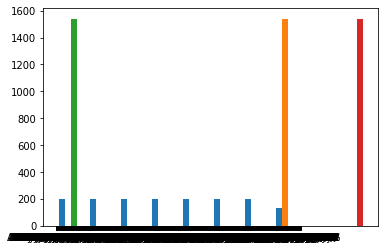

In [25]:
plt.hist(data, bins=10)

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

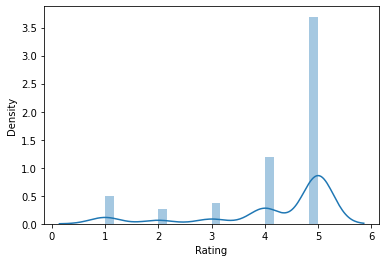

In [26]:
sns.distplot(data['Rating'])

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rating', ylabel='count'>

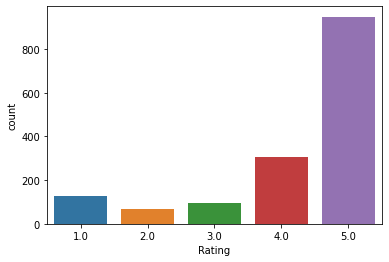

In [27]:
sns.countplot('Rating',data=data)

In [28]:
data.drop(['Timestamp'],axis=1,inplace=True)

C:\Users\Vikee\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
data.head()

,UserID,ProductID,Rating
0,A5JLAU2ARJ0BO,0321732944,5.0
1,ADLVFFE4VBT8,0439886341,1.0
2,A3OXHLG6DIBRW8,0439886341,3.0
3,A6FIAB28IS79,0439886341,1.0
4,A680RUE1FDO8B,0511189877,5.0


In [30]:
data.head()

,UserID,ProductID,Rating
0,A5JLAU2ARJ0BO,0321732944,5.0
1,ADLVFFE4VBT8,0439886341,1.0
2,A3OXHLG6DIBRW8,0439886341,3.0
3,A6FIAB28IS79,0439886341,1.0
4,A680RUE1FDO8B,0511189877,5.0


In [31]:
data.shape

(1540, 3)

## Observations :

- The data has no null values


- Out of  7824481 records, there are 4201696 unique users


- Out of  7824481 records, there are  476001 unique products


- There are 1540 number of users who has given more  than 50 number of ratings


- Majority of users have rated 5.


- Majority of users have rate on 2013



## Popularity Recommender model

In [32]:
data.groupby('ProductID')['Rating'].mean().sort_values(ascending=False).head()

ProductID
0321732944    5.0
0594450209    5.0
0594514789    5.0
059400232X    5.0
0594549558    5.0
Name: Rating, dtype: float64

In [33]:
data.groupby('ProductID')['Rating'].count().sort_values(ascending=False).head() 

ProductID
0972683275    1051
1400501466     235
0594481813      31
0528881469      27
1394860919      23
Name: Rating, dtype: int64

In [34]:
meanrating=pd.DataFrame(data.groupby('ProductID')['Rating'].mean())
meanrating

,Rating
ProductID,
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
0558835155,3.000000
059400232X,5.000000
0594012015,2.000000
0594017343,1.000000
0594017580,3.000000


In [35]:
meanrating['RatingsCount']=data.groupby('ProductID')['Rating'].count()

In [36]:
meanrating

,Rating,RatingsCount
ProductID,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1
059400232X,5.000000,3
0594012015,2.000000,8
0594017343,1.000000,1
0594017580,3.000000,1


## Observations :



- Popularity recommender models is based on popularity of the items which does not depend on the user's interest.

- Here we take the mean rating of each product and take the count of ratings given per product to see its popularity

- Based on this popularity, items will be recommended to the users


In [37]:
data.to_csv("product_ratings.csv",index=False)

In [38]:
data = pd.read_csv("product_ratings.csv")

## Collaborative Filtering Recommender model

In [39]:
from surprise import KNNWithMeans
from surprise import KNNBaseline 
from surprise import accuracy
from surprise import Dataset,Reader

In [40]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [41]:
data = Dataset.load_from_df(data[['UserID', 'ProductID', 'Rating']], reader)

## Split the data randomly into a train and test dataset

In [42]:
from surprise.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=.25,random_state=7)

### Item -Item Collaborative filtering

In [43]:

algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train_data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [44]:
# we can now query for specific predicions
uid = str('A3OXHLG6DIBRW8')  # raw user id
iid = str('0439886341')  # raw Product id

In [45]:
# get a prediction for specific users and items

pred = algo.predict(uid, iid, verbose=True)

user: A3OXHLG6DIBRW8 item: 0439886341 r_ui = None   est = 3.00   {'actual_k': 1, 'was_impossible': False}


In [46]:
# run the trained model against the testset

test_pred = algo.test(test_data)

### Evaluation - RMSE

In [47]:


print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.2753


1.2752985188184756

In [48]:
testset_new = train_data.build_anti_testset()

In [49]:
testset_new  # surprise library gives the global means of all variables

[('A26877IWJGISYM', '1400501466', 4.251082251082251),
 ('A26877IWJGISYM', '0594481813', 4.251082251082251),
 ('A26877IWJGISYM', '0594012015', 4.251082251082251),
 ('A26877IWJGISYM', '0970407998', 4.251082251082251),
 ('A26877IWJGISYM', '0594481902', 4.251082251082251),
 ('A26877IWJGISYM', '0594451647', 4.251082251082251),
 ('A26877IWJGISYM', '0594033934', 4.251082251082251),
 ('A26877IWJGISYM', '0558835155', 4.251082251082251),
 ('A26877IWJGISYM', '0594478162', 4.251082251082251),
 ('A26877IWJGISYM', '1394860919', 4.251082251082251),
 ('A26877IWJGISYM', '0594033926', 4.251082251082251),
 ('A26877IWJGISYM', '1094441252', 4.251082251082251),
 ('A26877IWJGISYM', '0528881469', 4.251082251082251),
 ('A26877IWJGISYM', '0511189877', 4.251082251082251),
 ('A26877IWJGISYM', '0979526191', 4.251082251082251),
 ('A26877IWJGISYM', '0899336795', 4.251082251082251),
 ('A26877IWJGISYM', '0594482127', 4.251082251082251),
 ('A26877IWJGISYM', '0594477670', 4.251082251082251),
 ('A26877IWJGISYM', '0594511

In [50]:
testset_new[0:5]

[('A26877IWJGISYM', '1400501466', 4.251082251082251),
 ('A26877IWJGISYM', '0594481813', 4.251082251082251),
 ('A26877IWJGISYM', '0594012015', 4.251082251082251),
 ('A26877IWJGISYM', '0970407998', 4.251082251082251),
 ('A26877IWJGISYM', '0594481902', 4.251082251082251)]

In [51]:
predictions = algo.test(testset_new[0:10000])
predictions[:5]

[Prediction(uid='A26877IWJGISYM', iid='1400501466', r_ui=4.251082251082251, est=3.598901098901099, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594481813', r_ui=4.251082251082251, est=4.045454545454546, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594012015', r_ui=4.251082251082251, est=1.8, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0970407998', r_ui=4.251082251082251, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594481902', r_ui=4.251082251082251, est=4.222222222222222, details={'actual_k': 0, 'was_impossible': False})]

In [52]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [53]:

predictions_df.columns = ["userId","productId","est_rating"]
predictions_df.sort_values(by = ["userId","productId" ,"est_rating"],ascending=False,inplace=True)
predictions_df

,userId,productId,est_rating
8339,AZBXKUH4AIW3X,1394860919,3.789474
8357,AZBXKUH4AIW3X,1348510390,2.000000
8349,AZBXKUH4AIW3X,134048160X,4.000000
8370,AZBXKUH4AIW3X,1254875778,4.200000
8365,AZBXKUH4AIW3X,1182702627,5.000000
...,...,...,...
5838,A105S56ODHGJEK,0558835155,3.000000
5843,A105S56ODHGJEK,0528881469,2.600000
5844,A105S56ODHGJEK,0511189877,5.000000
5859,A105S56ODHGJEK,0439886341,2.000000


## Recommend 5 new products to each users 

In [54]:
predictions_df.tail()

,userId,productId,est_rating
5838,A105S56ODHGJEK,0558835155,3.0
5843,A105S56ODHGJEK,0528881469,2.6
5844,A105S56ODHGJEK,0511189877,5.0
5859,A105S56ODHGJEK,0439886341,2.0
5879,A105S56ODHGJEK,0321732944,5.0


## Observation

- the user A105S56ODHGJEK has been recommended 5 products that are similar to the products that the user has bought

### User-User Collaborative filtering

In [60]:
from surprise.model_selection import train_test_split
train_data1, test_data1 = train_test_split(data, test_size=.25,random_state=7)

In [61]:

algo1 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo1.fit(train_data1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [62]:
# run the trained model against the testset

test_pred1 = algo1.test(test_data1)

### Evaluation - RMSE

In [63]:


print("User-based Model : Test Set")
accuracy.rmse(test_pred1, verbose=True)

User-based Model : Test Set
RMSE: 1.2753


1.2752985188184756

In [64]:
testset_new = train_data1.build_anti_testset()

In [65]:
predictions1 = algo1.test(testset_new[0:10000])
predictions1[:5]

[Prediction(uid='A26877IWJGISYM', iid='1400501466', r_ui=4.251082251082251, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594481813', r_ui=4.251082251082251, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594012015', r_ui=4.251082251082251, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0970407998', r_ui=4.251082251082251, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26877IWJGISYM', iid='0594481902', r_ui=4.251082251082251, est=5, details={'actual_k': 0, 'was_impossible': False})]

In [66]:
predictions_df1 = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions1])

In [67]:
predictions_df1.columns = ["userId","productId","est_rating"]
predictions_df1.sort_values(by = ["userId","productId" ,"est_rating"],ascending=False,inplace=True)
predictions_df1

,userId,productId,est_rating
8339,AZBXKUH4AIW3X,1394860919,1.0
8357,AZBXKUH4AIW3X,1348510390,1.0
8349,AZBXKUH4AIW3X,134048160X,1.0
8370,AZBXKUH4AIW3X,1254875778,1.0
8365,AZBXKUH4AIW3X,1182702627,1.0
...,...,...,...
5838,A105S56ODHGJEK,0558835155,4.0
5843,A105S56ODHGJEK,0528881469,4.0
5844,A105S56ODHGJEK,0511189877,4.0
5859,A105S56ODHGJEK,0439886341,4.0


In [68]:
predictions_df1.tail()

,userId,productId,est_rating
5838,A105S56ODHGJEK,0558835155,4.0
5843,A105S56ODHGJEK,0528881469,4.0
5844,A105S56ODHGJEK,0511189877,4.0
5859,A105S56ODHGJEK,0439886341,4.0
5879,A105S56ODHGJEK,0321732944,4.0


## Observation

- the user A105S56ODHGJEK has been recommended 5 products based on the users who have similar taste of products as this user




## Singular Value Decomposition (SVD) - Matrix Factorization based Collaborative Filtering

In [82]:
from surprise import SVD

In [83]:
from surprise.model_selection import train_test_split
train_data2, test_data2 = train_test_split(data, test_size=.25,random_state=7)

In [84]:
algo2 = SVD()
algo2.fit(train_data2)

In [85]:
predictions2 = algo2.test(test_data2)

In [86]:
predictions2

[Prediction(uid='AEWYUPCNDV7HY', iid='0594451647', r_ui=5.0, est=4.239195439660038, details={'was_impossible': False}),
 Prediction(uid='A30XZK10EZN9V4', iid='089933623X', r_ui=1.0, est=4.234367319514416, details={'was_impossible': False}),
 Prediction(uid='A3Q4TYJVAM4IRM', iid='0594481813', r_ui=5.0, est=4.066352597889193, details={'was_impossible': False}),
 Prediction(uid='A1PM7HH4F77NEH', iid='0972683275', r_ui=5.0, est=4.525345871590941, details={'was_impossible': False}),
 Prediction(uid='AQ3IN3MRXQ5KH', iid='0972683275', r_ui=5.0, est=4.525345871590941, details={'was_impossible': False}),
 Prediction(uid='A2UEB48LAWFUCW', iid='0972683275', r_ui=3.0, est=4.525345871590941, details={'was_impossible': False}),
 Prediction(uid='A3TRY87JJCA5Y8', iid='0972683275', r_ui=4.0, est=4.525345871590941, details={'was_impossible': False}),
 Prediction(uid='A3HC7NWLKCPX4X', iid='1400501466', r_ui=5.0, est=3.62832852772412, details={'was_impossible': False}),
 Prediction(uid='A28X0LT2100RL1', i

In [90]:

print("SVD matrix Factorization  : Test Set")
accuracy.rmse(predictions2, verbose=True)

SVD matrix Factorization  : Test Set
RMSE: 1.2270


1.2269677784694129

In [87]:
from collections import defaultdict

In [88]:
def get_top_n(predictions2, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions2:
        top_n[uid].append((iid, est))

        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [89]:
top_n = get_top_n(predictions2, n=10)
top_n

defaultdict(list,
            {'AEWYUPCNDV7HY': [('0594451647', 4.239195439660038)],
             'A30XZK10EZN9V4': [('089933623X', 4.234367319514416)],
             'A3Q4TYJVAM4IRM': [('0594481813', 4.066352597889193)],
             'A1PM7HH4F77NEH': [('0972683275', 4.525345871590941)],
             'AQ3IN3MRXQ5KH': [('0972683275', 4.525345871590941)],
             'A2UEB48LAWFUCW': [('0972683275', 4.525345871590941)],
             'A3TRY87JJCA5Y8': [('0972683275', 4.525345871590941)],
             'A3HC7NWLKCPX4X': [('1400501466', 3.62832852772412)],
             'A28X0LT2100RL1': [('0972683275', 4.525345871590941)],
             'AVJORH3ACR2A5': [('0972683275', 4.525345871590941)],
             'A14JBDSWKPKTZA': [('0972683275', 4.525345871590941)],
             'A1ZPY91VE3IDN1': [('0972683275', 4.525345871590941)],
             'A2YYHSORXIHZCS': [('0972683275', 4.525345871590941)],
             'A18U49406IPPIJ': [('0972683275', 4.525345871590941)],
             'A1N5FSCYN4796F': [('

# Summary :

- Collaborative filtering is based on the similarity of items the user has bought or based on user's purchasing behaviour

- It is personalised recommendataion system

- But the popularity based recommender system is based on the ratings mean and counts and it is not personalised. 

- It is just based on popularity of items

- Therefore collaborative fitlering is more effective than the popularity based

- One drawback of collaborative fitlering is cold start problem if the user or items is new. 

- The new items or products will not get recommendation

- RMSE for SVD approach is less (1.22) compared to the User-user and item-item collabirative approach (1.275)



